
## Grundlagen von Vektoren

Ein **Vektor** ist in der Mathematik und Informatik eine geordnete Liste von Zahlen – oft als Punkt in einem mehrdimensionalen Raum aufgefasst. Typischerweise spricht man von einem $n$-dimensionalen Vektor:

$$
\mathbf{v} = (v_1, v_2, \dots, v_n)
$$

wobei jedes $v_i$ eine Komponente darstellt. In Machine-Learning-Anwendungen entstehen Vektoren oft als **Embeddings**, z. B. aus neuronalen Netzen, die Wörter, Bilder oder Dokumente auf $\mathbb{R}^{128}$ oder $\mathbb{R}^{768}$ abbilden.

- **Länge/Norm**: 
  $$
  \|\mathbf{v}\| = \sqrt{\sum_{i=1}^n v_i^2}
  $$
- **Ähnlichkeit**:  
  Cosinus-Ähnlichkeit  
  $$
  \cos(\mathbf{a}, \mathbf{b}) 
  = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \, \|\mathbf{b}\|}
  $$
  oder euklidische Distanz  
  $$
  \|\mathbf{a} - \mathbf{b}\|
  $$
- **Operatoren**: Addition, Skalarmultiplikation, Punktprodukt  

---

## 🌐 Was sind Vektor-Datenbanken?

Eine **Vektor-Datenbank** ist eine spezialisierte Datenbank, die große Mengen von Vektoren (z. B. Embeddings) effizient speichert und durchsucht. Ihr Fokus liegt auf:

### 🔍 Kern-Funktionalitäten

1. **Speicherung**  
   - Hochvolumige Vektor-Daten (z. B. 128- bis 768-dimensionale Embeddings)  
   - Komprimierung / Quantisierung für geringen Speicher-Footprint  

2. **Ähnlichkeitssuche (Nearest Neighbor Search)**  
   - „Finde die _k_ ähnlichsten Vektoren zu einem Query-Vektor“  
   - Millisekunden-Antwortzeiten auch bei Millionen von Vektoren  

3. **Indexierung**  
   - Approximate Nearest Neighbor (ANN)-Algorithmen:  
     - **HNSW** (Hierarchical Navigable Small World)  
     - **IVF-PQ** (Inverted File mit Product Quantization)  
     - **Faiss Graph-Indexe**  
   - Balance zwischen Genauigkeit und Geschwindigkeit über Parametersteuerung  

4. **Metadaten-Filtering**  
   - Kombinierte Suche: Vektor-Ähnlichkeit + klassische Filter (z. B. Zeitbereich, Tags)  
   - Boolesche, Range- und Geo-Filter direkt im Query  

5. **Skalierung & Verfügbarkeit**  
   - **Sharding**: Verteilung von Collections über mehrere Knoten  
   - **Replikation**: Ausfallsicherheit durch Leader-/Follower-Strategien  
   - Konsistenzmodelle (z. B. quorum-basiert)  

---

### 🧩 Typische Komponenten

| Komponente    | Beschreibung                                                                 |
|---------------|------------------------------------------------------------------------------|
| **Collection / Index** | Logische Gruppierung gleichformatiger Vektoren                       |
| **Payload**   | Schlüssel–Wert-Metadaten zu jedem Vektor (z. B. Dokument-ID, Timestamp)      |
| **API**       | REST & gRPC Endpunkte für Upsert, Search, Scroll, Delete, Bulk-Operationen   |
| **SDKs**      | Offizielle Clients in Python, Go, Java, JavaScript u.v.m.                    |
| **Cluster-Modus** | Automatisches Sharding, Replikation & Load Balancing                   |

---

> **Tipp:**  
> Nutze Payload-Filter, um die Vektor-Suche auf relevante Subsets zu beschränken (z. B. nur Einträge aus 2024).  

---

 


## 🏗️ Aufbau von Qdrant

Qdrant (Quick Distance) ist eine leistungsstarke Open-Source-Vector-Datenbank mit einem Rust-basierten Kern und HNSW-Indexierung.

### ⚙️ Architektur

1. **Core (Rust)**  
   - Effizientes Speicher- & Thread-Management  
   - Geringer Ressourcen-Footprint  

2. **Collections**  
   - Gruppierung fester dimensionaler Vektorfelder  
   - Anpassbare HNSW-Parameter:  
     - **M**: Anzahl Nachbarn pro Layer  
     - **ef_construction**: Konstruktionstiefe  
     - **ef_search**: Suchgenauigkeit vs. Geschwindigkeit  

3. **Index-Engine: HNSW**  
   - Hierarchical Navigable Small World Graph  
   - Hochperformante Approximate Nearest Neighbor Search  

### 💾 Speicherung & Persistenz

| Bereich        | Details                                                    |
| -------------- | ---------------------------------------------------------- |
| **Vektoren**   | Komprimiert & quantisiert auf SSD/Platte                  |
| **Payload**    | Separates Key–Value Store für Metadaten                    |
| **Metadaten**  | Optional: RocksDB für ACID-Konformität                    |


### 🛠️ API & SDKs

| Schnittstelle | Zweck                                   |
| ------------- | --------------------------------------- |
| **gRPC**      | Hoher Durchsatz, niedrige Latenz        |
| **REST**      | Einfache Integration & Testbarkeit      |
| **SDKs**      | Python · Go · Java · JavaScript · …     |

**Wichtige Endpunkte**: `upsert`, `search`, `scroll`, `delete`


### 🔄 Cluster-Modus & Skalierung

- **Sharding**: Automatische Verteilung von Collections  
- **Replikation**: Leader-/Follower-Strategie für Ausfallsicherheit  
- **Konsistenz**: Quorum-basiertes Schreib-/Lese-Modell  


### 🎁 Zusatzfeatures

- **Payload-Filter**: Boolesche, Range- & Geo-Abfragen  
- **Batch-API**: Bulk-Operationen für Upsert & Search  
- **Snapshot & Backup**: Point-in-Time-Wiederherstellung  


> **Pro-Tipp:** Nutze den Kubernetes-Operator für automatisches Scaling und Rolling Updates.


### 0. Codeblock für Libraries

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install mpl_toolkits
!{sys.executable} -m pip install qdrant-client
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install python-dotenv

### 1. Qdrant-Client initialisieren

Wir verbinden uns mit dem Qdrant-Server. Entweder lokal (Standard: http://localhost:6333) oder über einen gehosteten Dienst mit API-Key.


In [ ]:
from qdrant_client import QdrantClient
from qdrant_client.http import models as rest
from dotenv import load_dotenv
import os

load_dotenv()  # Lädt Variablen aus .env in die Umgebung
qdrant_api_key = os.getenv("QDRANT_API_KEY")
qdrant_url = os.getenv("QDRANT_URL")

# Verbindung zu Qdrant herstellen
try:
    client = QdrantClient(
        url=qdrant_url,
        api_key=qdrant_api_key,
        prefer_grpc=False,
        port=6333
    )
    # Testverbindung: Liste der Collections abrufen
    collections = client.get_collections()
    print("Verbindung zu Qdrant erfolgreich!")
except UnauthorizedException:
    print("Fehler: API-Key ungültig oder nicht gesetzt.")
except Exception as e:
    print(f"Anderer Fehler: {e}")

### 2. Collection anlegen

Eine **Collection** ist die logische Gruppe von gleichformatigen Vektoren.  
Wir legen hier eine Collection „my_vectors“ mit 128-dimensionalen Cosine-Vektoren an.


In [6]:

from qdrant_client.http import models as rest

collection_name = "my_vectors"
vector_size     = 128
distance_metric = rest.Distance.COSINE

# Vorhandene Collection löschen
if client.collection_exists(collection_name):
    client.delete_collection(collection_name)
    print(f"Alte Collection '{collection_name}' gelöscht.")

# Neue Collection erstellen
client.create_collection(
    collection_name=collection_name,
    vectors_config=rest.VectorParams(
        size=vector_size,
        distance=distance_metric
    )
)
print(f"Collection '{collection_name}' erfolgreich erstellt!")


Alte Collection 'my_vectors' gelöscht.
Collection 'my_vectors' erfolgreich erstellt!


### 3. Vektoren einfügen (Upsert)

Mit `upsert` fügen wir Punkte (Vektor + Payload) ein oder aktualisieren sie.  
Payload kann z. B. Text, Timestamp, Tags etc. sein.


In [7]:
import numpy as np
import pandas as pd
from qdrant_client.http.models import PointStruct

# Cell X: Verbessertes Upsert mit Vorher/Nachher-Darstellung

# Beispiel-IDs und Beispiel-Punkte erzeugen
ids = [1, 2, 3]
points = [
    PointStruct(
        id=1,
        vector=np.random.rand(vector_size).tolist(),
        payload={"text": "Hallo Welt", "year": 2023}
    ),
    PointStruct(
        id=2,
        vector=np.random.rand(vector_size).tolist(),
        payload={"text": "Testpunkt", "year": 2022}
    ),
    PointStruct(
        id=3,
        vector=np.random.rand(vector_size).tolist(),
        payload={"text": "Beispiel", "year": 2024}
    ),
]

# ——— 3) Vorher: existierende Payloads abfragen ———
before = []
for pid in ids:
    res = client.retrieve(collection_name=collection_name, ids=[pid])
    if res:
        before.append({"id": pid, **res[0].payload})
    else:
        before.append({"id": pid, "text": None, "year": None})
df_before = pd.DataFrame(before).set_index("id")

# ——— 4) Upsert ausführen ———
client.upsert(collection_name=collection_name, points=points)

# ——— 5) Nachher: aktualisierte Payloads abfragen ———
after = []
for pid in ids:
    res = client.retrieve(collection_name=collection_name, ids=[pid])
    if res:
        after.append({"id": pid, **res[0].payload})
    else:
        after.append({"id": pid, "text": None, "year": None})
df_after = pd.DataFrame(after).set_index("id")

# ——— 6) Vergleichs-DataFrame erstellen ———
df_compare = pd.concat(
    [df_before.add_prefix("davor_"), df_after.add_prefix("danach_")],
    axis=1
)

# ——— 7) Tabellarische Darstellung ———
print("=== Vorher vs. Nachher Payloads ===")
display(df_compare)



=== Vorher vs. Nachher Payloads ===


,davor_text,davor_year,danach_text,danach_year
id,,,,
1,None,None,Hallo Welt,2023
2,None,None,Testpunkt,2022
3,None,None,Beispiel,2024


### 4. Ähnlichkeitssuche (Search)
Mit `client.query_points` findest du die _k_ ähnlichsten Vektoren zu einem gegebenen Query-Vektor.  
Dabei kannst du einstellen, wie viele Ergebnisse (`limit`) du zurückbekommst und ob das zugehörige Payload mitgeliefert wird (`with_payload=True`).

**Parameter**  
- `collection_name`: Name der Collection, in der gesucht wird  
- `query_vector`: Liste mit `vector_size` reellen Zahlen  
- `limit`: Anzahl der zurückzugebenden Top-Ergebnisse  
- `with_payload`: ob Metadaten (Payload) mitgeliefert werden sollen  

**Rückgabe**  
Eine Liste von Treffer-Objekten mit  
- `id`: ID des Vektors  
- `score`: Ähnlichkeitswert (je höher, desto ähnlicher)  
- `payload`: das zugehörige Metadaten-Dict 

In [7]:
# Cell X: Query + Top-3-Ergebnisse

import numpy as np
import pandas as pd

# 1) Query-Vektor erzeugen
query_vector = np.random.rand(vector_size)
print(f"Query-Vektor ({vector_size}D), Anzeige der ersten 5 Werte: {query_vector[:5]}…\n")

# 2) Suche nach den 3 ähnlichsten Punkten
response = client.query_points(
    collection_name=collection_name,
    query=query_vector.tolist(),   # als Liste übergeben
    limit=3,                        # Top-3 Treffer
    with_payload=True              # Metadaten mitliefern
)

# 3) Ergebnisse sammeln
rows = [
    {
        "ID": hit.id,
        "Score": round(hit.score, 4),
        **hit.payload                # Payload-Felder als eigene Spalten
    }
    for hit in response.points
]

# 4) In DataFrame packen und anzeigen
df = pd.DataFrame(rows)
display(df)


Query-Vektor (128D), Anzeige der ersten 5 Werte: [0.80190169 0.46971175 0.64884422 0.43809186 0.46574737]…



,ID,Score,text,year
0,1,0.7814,Hallo Welt,2023
1,3,0.7613,Beispiel,2024
2,2,0.7566,Testpunkt,2022


### 5. Pagination mit Scroll

Mit `scroll` iterieren wir sequentiell über alle Punkte in Batches.  
Hier in Batch-Größe 2.


In [8]:
# 1) Erster Scroll-Aufruf
points_page, next_offset = client.scroll(
    collection_name=collection_name,
    limit=2,
    with_payload=True
)

# 2) Erste Seite ausgeben
print("Scroll Seite 1:")
for p in points_page:
    print(f"ID={p.id} → Payload={p.payload}")

# 3) Weitere Seiten
seite = 2
while next_offset is not None:
    points_page, next_offset = client.scroll(
        collection_name=collection_name,
        limit=2,
        offset=next_offset,
        with_payload=True
    )
    print(f"\nScroll Seite {seite}:")
    for p in points_page:
        print(f"ID={p.id} → Payload={p.payload}")
    seite += 1

Scroll Seite 1:
ID=1 → Payload={'text': 'Hallo Welt', 'year': 2023}
ID=2 → Payload={'text': 'Testpunkt', 'year': 2022}

Scroll Seite 2:
ID=3 → Payload={'year': 2024, 'text': 'Beispiel'}


### 6. Löschen von Punkten & Collection

- Einzelnen Punkt löschen: `delete(point_id)`  
- Ganze Collection entfernen: `delete_collection`


In [9]:

# Einzelnen Punkt entfernen
client.delete(
    collection_name=collection_name,
    points_selector=rest.PointIdsList(points=[3]) 
)
print("Punkt mit ID=3 gelöscht.")

# Collection löschen
client.delete_collection(collection_name=collection_name)
print(f"Collection '{collection_name}' komplett entfernt.")


Punkt mit ID=3 gelöscht.
Collection 'my_vectors' komplett entfernt.


---
## Vektoren-Suchverfahren:

### ANN (Approximate Nearest Neighbor)

**ANN** steht für **Approximate Nearest Neighbor**. Die ANN-Suche wird verwendet, um schnell die ähnlichsten Vektoren zu einem gegebenen Suchvektor zu finden und ist eine schnellere aber unpräzisere Alternative zu KNN.

#### Warum "approximate"?

Das exakte Finden der nächsten Nachbarn in sehr großen Datensätzen ist rechnerisch aufwendig und langsam. ANN-Algorithmen liefern stattdessen eine sehr gute Annäherung an das exakte Ergebnis, sind aber viel schneller und skalierbarer. Das ist besonders wichtig bei Anwendungen wie Bild-, Text- oder Ähnlichkeitssuche mit Millionen von Einträgen.

#### Wie funktioniert die ANN-Suche in Qdrant?

Statt alle Vektoren einzeln zu vergleichen (was einer Zeitkomplexität von O(N) entsprechen würde), nutzt Qdrant den HNSW-Algorithmus (Hierarchical Navigable Small World Graph). Dieser hat eine Zeitkomplexität von O(logN) und ist damit viel schneller als die simple KNN Suche.

### Funktionsweise von HNSW

Der **HNSW-Algorithmus** (Hierarchical Navigable Small World) ist ein graphbasierter Ansatz für die Approximate Nearest Neighbor-Suche. Die Grundidee ist, dass alle Vektoren als Knoten in einem mehrschichtigen Graphen organisiert werden. Jeder Knoten ist mit einer begrenzten Anzahl von Nachbarn verbunden – ähnlich wie in einem sozialen Netzwerk.

#### Wie funktioniert die Suche?

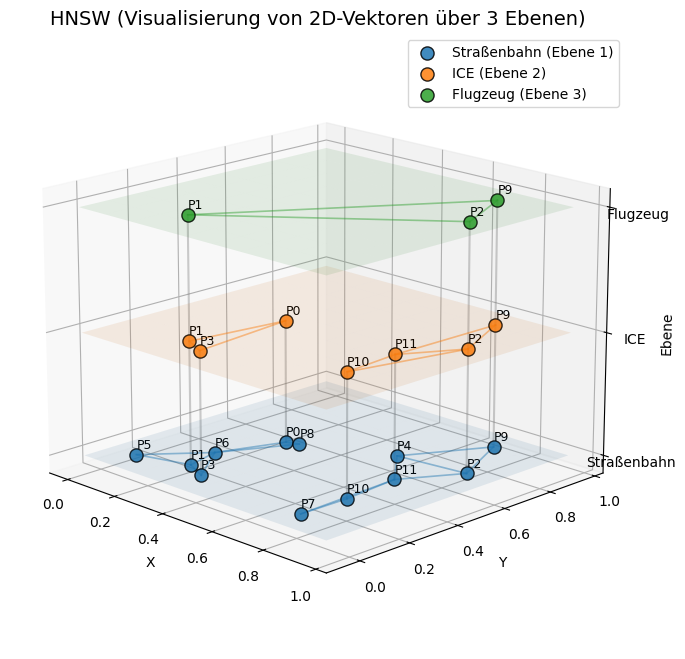

1. **Hierarchie (Level-Struktur):**  
   Jeder Vektor wird beim Einfügen zufällig einer maximalen Ebene zugeordnet (wie bei einer Skip-List).  
   Die oberste Ebene enthält nur wenige Knoten, die unterste Ebene enthält alle.

2. **Suche auf oberster Ebene:**  
   Die Suche beginnt auf der höchsten Ebene an einem beliebigen Startpunkt.  
   Auf dieser Ebene sucht der Algorithmus unter den Nachbarn des aktuellen Knotens immer denjenigen, der dem Suchvektor am nächsten ist (nach gewählter Distanzmetrik, z.B. Kosinus oder Euklid).  
   Sobald kein Nachbar mehr gefunden wird, der näher am Suchvektor liegt, wechselt der Algorithmus eine Ebene tiefer.

3. **Abstieg durch die Ebenen:**  
   Auf jeder Ebene wiederholt sich das Vorgehen:  
   - Suche unter den Nachbarn des aktuellen Knotens denjenigen, der dem Suchvektor am nächsten ist (lokales Minimum).
   - Wenn kein besserer Nachbar gefunden wird, gehe eine Ebene tiefer.
   - Der aktuelle Knoten wird als Startpunkt für die nächste Ebene verwendet.

4. **Feinsuche auf der untersten Ebene:**  
   Auf der untersten Ebene (Level 0) sind alle Vektoren enthalten.  
   Hier wird die Suche lokal verfeinert, indem die Nachbarn des aktuellen Knotens durchsucht werden, bis die ähnlichsten Vektoren gefunden sind.

#### Vorteile dieser Struktur

- **Effiziente Suche:**  
  Durch die Ebenenstruktur kann der Algorithmus große Sprünge machen und muss nicht alle Vektoren vergleichen (wie bei einer Skip-List).
- **Schnelle Navigation:**  
  Die Suche ist logarithmisch zur Anzahl der Vektoren, ähnlich wie bei einer Skip-List.
- **Hohe Genauigkeit:**  
  Trotz Approximation werden meist die tatsächlich ähnlichsten Nachbarn gefunden.
- **Skalierbarkeit:**  
  Funktioniert auch bei Millionen von Vektoren effizient.

#### Analogie: HNSW als Verkehrsnetz – Straßenbahn, ICE und Flugzeug

Stell dir vor, du möchtest möglichst schnell von einer beliebigen Stadt (Startpunkt) zu einer Zielstadt (dem gesuchten Vektor) reisen. In Deutschland gibt es dafür verschiedene Verkehrsmittel mit unterschiedlichen Reichweiten und Geschwindigkeiten:

- **Flugzeug (höchste Ebene):** Verbindet nur die größten Städte (wenige Knoten, große Sprünge).
- **ICE (mittlere Ebene):** Verbindet viele größere Städte (mehr Knoten, mittlere Sprünge).
- **Straßenbahn (unterste Ebene):** Verbindet alle Stadtteile und Haltestellen (alle Knoten, kleine Sprünge).

**Wie funktioniert die Suche?**

1. **Start auf höchster Ebene (Flugzeug):**  
   Du steigst ins Flugzeug und fliegst zur Großstadt, die deinem Ziel am nächsten liegt.  
   Wenn du mit dem Flugzeug nicht näher ans Ziel kommst, steigst du auf den ICE um.

2. **Mittlere Ebene (ICE):**  
   Mit dem ICE fährst du weiter und hältst an Bahnhöfen, die näher am Ziel liegen.  
   Sobald du mit dem ICE nicht mehr näher ans Ziel kommst, steigst du auf die Straßenbahn um.

3. **Unterste Ebene (Straßenbahn):**  
   Jetzt nutzt du die Straßenbahn, um die letzten Meter bis zur Zielstadt oder sogar zur Zielhaltestelle zu fahren.  
   Hier kannst du dich sehr fein durch das Netz bewegen und findest so den exakten Zielpunkt.

**Was bringt das?**  
- Mit dem Flugzeug überspringst du große Distanzen und kommst schnell in die Nähe deines Ziels.
- Mit dem ICE kommst du noch näher heran.
- Mit der Straßenbahn erreichst du schließlich ganz genau dein Ziel.

**Übertragen auf HNSW:**  
- Flugzeuge, ICEs und Straßenbahnen entsprechen den verschiedenen Ebenen im HNSW-Graphen.
- Auf jeder Ebene suchst du immer den Nachbarn, der deinem Ziel am nächsten ist.
- Wenn du auf einer Ebene nicht mehr näher kommst, steigst du eine Ebene tiefer um.
- So gelangst du mit wenigen, aber gezielten Sprüngen sehr effizient zum gesuchten Vektor. 
---